In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter
import pymc as pm
import aesara.tensor as at

# 假设观测到的图像 I_obs 是一个 NumPy 数组
I_obs = np.random.poisson(lam=10, size=(100, 100))  # 示例数据

# 定义 PyMC 模型
with pm.Model() as model:
    # 定义 ground truth 图像 I 的先验分布（假设为均匀分布）
    I = pm.Uniform("I", lower=0, upper=100, shape=I_obs.shape)
    
    # 定义高斯卷积函数
    def convolve_image(image, sigma=1.0):
        return gaussian_filter(image, sigma=sigma)
    
    # 定义卷积后的图像 I_conv
    I_conv = pm.Deterministic("I_conv", convolve_image(I))
    
    # 定义似然函数：卷积后的图像经过泊松噪声污染
    likelihood = pm.Poisson("likelihood", mu=I_conv, observed=I_obs)
    
    # 运行采样
    idata = pm.sample(10000)  # 采样 10000 个点

import arviz as az
import matplotlib.pyplot as plt

az.plot_trace(idata)
plt.show()

# 绘制后验分布
az.plot_posterior(idata)
plt.show()

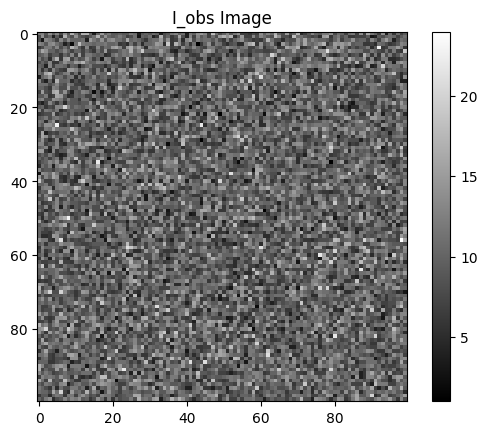

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 假设观测到的图像 I_obs 是一个 NumPy 数组
I_obs = np.random.poisson(lam=10, size=(100, 100))  # 示例数据

# 显示 I_obs 的图像
plt.imshow(I_obs, cmap='gray')
plt.colorbar()
plt.title('I_obs Image')
plt.show()